In [3]:
import pandas as pd
import numpy as np
import matplotlib
% matplotlib inline
import os, time, json, requests
import _pickle as pickle

In [2]:
base_path = '../../'
path1 = os.path.join(base_path, 'sqlResult_1558435.csv')

In [27]:
content1 = pd.read_csv(path1, encoding = "gb18030")
content1

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...
5,89612,张怡,中国证券报?中证网,受到A股被纳入MSCI指数的利好消息刺激，A股市场从周三开始再度上演龙马行情，周四上午金...,"{""type"":""市场"",""site"":""中证网"",""commentNum"":""0"",""jo...",金融股一枝独秀 配置价值犹存,http://www.cs.com.cn/gppd/201706/t20170623_533...
6,89611,NaN,威锋网@http://www.feng.com/,虽然至今夏普智能手机在市场上无法排得上号，已经完全没落，并于 2013 年退出中国市场，但是...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""21""...",配骁龙660 全面屏鼻祖夏普新机酝酿中,http://www.cnbeta.com/articles/tech/623603.htm
7,89610,申玉彬 整理,中国证券报?中证网,沙漠雄鹰：震荡有利消化套牢筹码\r\n 周四开盘上证50在银行券商大蓝筹带动下一度涨近...,"{""type"":""市场"",""site"":""中证网"",""commentNum"":""0"",""jo...",博友早评：震荡有利消化套牢筹码,http://www.cs.com.cn/gppd/201706/t20170623_533...
8,89609,李杭_BJS4645,荆楚网-楚天都市报,（原标题：武汉警方一下子抓了808人，还都是俊男靓女！原来他们每天偷偷摸摸干这事！）\r\n...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""1600""...",武汉千余警察出动 抓获808名俊男靓女全是诈骗犯,http://news.163.com/17/0614/14/CMT9N8G80001899...
9,89608,吴瞬,中国证券报?中证网,6月21日，A股纳入MSCI指数尘埃落定，但当天被寄予厚望的券商股并未扛起反弹大旗。22...,"{""type"":""市场"",""site"":""中证网"",""commentNum"":""0"",""jo...",纳入MSCI指数 A股长期配置价值提升,http://www.cs.com.cn/gppd/201706/t20170623_533...


In [14]:
content1.iloc[0]['content']

'此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。有人猜测这也是将精力主要用到MIUI 9的研发之中。\r\nMIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。\r\n当然，关于MIUI 9的确切信息，我们还是等待官方消息。\r\n'

In [28]:
content1 = content1['content']
content1

0        此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...
1        骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...
2        此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...
3          这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n
4        （原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...
5        　　受到A股被纳入MSCI指数的利好消息刺激，A股市场从周三开始再度上演龙马行情，周四上午金...
6        虽然至今夏普智能手机在市场上无法排得上号，已经完全没落，并于 2013 年退出中国市场，但是...
7        　　沙漠雄鹰：震荡有利消化套牢筹码\r\n　　周四开盘上证50在银行券商大蓝筹带动下一度涨近...
8        （原标题：武汉警方一下子抓了808人，还都是俊男靓女！原来他们每天偷偷摸摸干这事！）\r\n...
9        　　6月21日，A股纳入MSCI指数尘埃落定，但当天被寄予厚望的券商股并未扛起反弹大旗。22...
10       　　证券时报网（www.stcn.com）06月23日讯\r\n　　据上证报道，6月初以来，...
11       ?\r\n　　巨丰早评：市场将再次探底\r\n　　【巨丰观点】\r\n　　周四大盘冲高回落，...
12       中新网6月19日电 据外媒报道，美国底特律一名男子1976年因为一根头发被定谋杀罪，监禁41...
13       　　曹先生：风格转换前的阵痛\r\n　　今日早盘两地低开，之后一度震荡走高，领涨的仍然是上证...
14       6月21日，MSCI在官网发布公告称，从明年6月起将中国A股纳入MSCI新兴市场指数和MSC...
15       　　中国证券网讯（记者 费天元）沪深两市周五临近午盘出现快速跳水，沪指连续跌穿5日、10日及...
16       九成以上的源包用逐位对应的方式构建，未来版本的 Debian 还将提供验证包的工具和元数据；.

In [35]:
content1 = list(content1)
content = ''.join([str(el) for el in content1])
content[:1000]

'此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。有人猜测这也是将精力主要用到MIUI 9的研发之中。\r\nMIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。\r\n当然，关于MIUI 9的确切信息，我们还是等待官方消息。\r\n骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考虑性能而去屏蔽掉小核心。相反，他们正联手微软，找到一种适合桌面平台的、兼顾性能和功耗的完美方案。\r\n报道称，微软已经拿到了一些新的源码，以便Windows 10更好地理解big.little架构。\r\n资料显示，骁龙835作为一款集成了CPU、GPU、基带、蓝牙/Wi-Fi的SoC，比传统的Wintel方案可以节省至少30%的PCB空间。\r\n按计划，今年Q4，华硕、惠普、联想将首发骁龙835 Win10电脑，预计均是二合一形态的产品。\r\n当然，高通骁龙只是个开始，未来也许还能见到三星Exynos、联发科、华为麒麟、小米澎湃等进入Windows 10桌面平台。\r\n此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n至于电池缩水，可能与刘作虎所说，一加手机5要做市面最轻薄大屏旗舰的设定有关。\r\n按照目前掌握的资料，一加手机5拥有5.5寸1080P三星AMOLED显示屏、6G/8GB RAM，64GB/128GB ROM，双1600万摄像头，备货量“惊喜”。\r\n根据京东泄露的信息，一加5起售价是xx99元，应该是在2799/2899/2999中的某个。\r\n这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清晨交警发现有一女子赤裸上身，行走在南坪快速上，期间还起了轻生年头，一辅警发现后赶紧为其披上黄衣，并一路劝说她。\r\n那么事发时\r\n到底都发生了些什么呢？\r\n南都记者带您一起还原现场\r\n南都记者在龙岗大队坂田中队见到了辅警刘青（发现女生的辅警），一位外表高大帅气，说话略带些腼腆的90后青年。\r\n刘青介绍

In [36]:
with open('sqlResult.pkl', 'wb') as f:
    pickle.dump(content, f)

In [ ]:
# 维基百科处理
# pycharm
import os, re, traceback
import _pickle as pickle
from concurrent.futures import ProcessPoolExecutor


patten_1 = '<doc id=".{1,100}">'
patten_2 = '</doc>'

def go(file):
    try:
        print(file)
        file_path_i = os.path.join('AA', file)
        file_path_o = os.path.join('AA_output', 'replaced_' + file)
        with open(file_path_i, 'r', encoding='utf8') as f_i, open(file_path_o, 'wb') as f_o:
            content = f_i.readlines()
            content = [re.sub(patten_1, '', el) for el in content]
            content = [re.sub(patten_2, '', el) for el in content]
            content = [el.strip() for el in content if el.strip()]
            pickle.dump('\n'.join(content), f_o)
    except:
        print(traceback.format_exc())

if __name__ == '__main__':
    executor = ProcessPoolExecutor()
    path2 = 'AA'
    file_list = os.listdir(path2)
    for file in file_list:
        executor.submit(go, file)
    executor.shutdown()

In [51]:
import _pickle as pickle
files = os.listdir('AA_output')
content = ''
for file in files:
    file = os.path.join('AA_output', file)
    with open(file, 'rb') as f:
        content += pickle.load(f)
        content += '\n'
with open('sqlResult.pkl', 'rb') as f:
    content += pickle.load(f)
    content += '\n'


In [52]:
del content

In [ ]:
import _pickle as pickle
from concurrent.futures import ProcessPoolExecutor
import jieba, os, gc


files = os.listdir('AA_output')
content = ''

def go(file):
    _file = file.split('.')[0] + '.pkl'
    try:
        file = os.path.join('AA_output', file)
        with open(file, 'rb') as f:
            content = pickle.load(f)
            # content = content.replace('\n', ' ')
            content = list(jieba.cut(content))
            # content = ' '.join(content)
        with open(os.path.join('temp', _file), 'wb') as f:
            pickle.dump(content, f)
    except:
        import traceback
        print(traceback.format_exc())
    finally:
        print(file)
        gc.collect()


if __name__ == '__main__':
    # executor = ProcessPoolExecutor(6)
    # for file in files:
    #     executor.submit(go, file)
    # executor.shutdown()

    with open('sqlResult.pkl', 'rb') as f:
        sql = pickle.load(f)
        sql = sql.split('\n')
        sql = [list(jieba.cut(el)) for el in sql]
        sql = [' '.join(el) for el in sql]
        # sql = ' '.join(sql)
    with open('gensim_input.txt', 'w', encoding='utf8') as f:
        try:
            f.write('\n'.join(sql))
        except:
            import traceback
            print(traceback.format_exc())
            for el in sql:
                f.write(el + '\n')
            print('success')
        f.write('\n')

    file_list = os.listdir('temp')
    with open('gensim_input.txt', 'a', encoding='utf8') as f:
        for file in file_list:
            path = os.path.join('temp', file)
            with open(path, 'rb') as f2:
                content = pickle.load(f2)
            content = ' '.join(content)
            f.write(content)
            f.write('\n')


In [2]:
import pandas as pd
import numpy as np
import matplotlib
% matplotlib inline
import os, time, json, requests
import _pickle as pickle

In [3]:
from gensim import models
from gensim.models.word2vec import LineSentence, Word2Vec

In [3]:
cursor = LineSentence(open('gensim_input.txt', 'r', encoding='utf8'))

In [2]:
model = Word2Vec(corpus_file='gensim_input.txt', workers=4, sg=0, window=5, iter=5, compute_loss=True)

In [5]:
model.save('word2vec.model')

In [20]:
del model

In [4]:
model = Word2Vec.load('word2vec.model')

In [5]:
model.wv.most_similar('苹果')

[('苹果公司', 0.7495195865631104),
 ('黑莓', 0.742046594619751),
 ('iPhone', 0.708290696144104),
 ('微软', 0.696721076965332),
 ('App', 0.6943191289901733),
 ('Google', 0.6807045936584473),
 ('小米', 0.6801702976226807),
 ('Amazon', 0.6785373687744141),
 ('Apple', 0.6736325621604919),
 ('薯片', 0.6705299615859985)]

In [6]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[:10]

In [7]:
analogy('中国', '汉语', '美国')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('西语', 0.6692894697189331),
 ('法语', 0.6689296960830688),
 ('芬兰语', 0.6644811630249023),
 ('荷兰语', 0.6432891488075256),
 ('威尔士语', 0.6224812269210815),
 ('南非语', 0.6138501763343811),
 ('英语词汇', 0.598397970199585),
 ('英语', 0.5905696153640747),
 ('印地语', 0.5905014276504517),
 ('瑞典语', 0.5836396217346191)]

In [8]:
analogy('美国', '奥巴马', '美国')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('特朗普', 0.8787534832954407),
 ('川普', 0.8454629182815552),
 ('布什', 0.8384653329849243),
 ('克林顿', 0.8381657600402832),
 ('小布什', 0.8148733377456665),
 ('尼克松', 0.8132262229919434),
 ('柯林顿', 0.803192675113678),
 ('里根', 0.7803219556808472),
 ('老布什', 0.776890754699707),
 ('布殊', 0.7600579261779785)]

In [9]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline


In [17]:
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [20]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for i, word in enumerate(model.wv.vocab):
        if i > 200:
            break
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


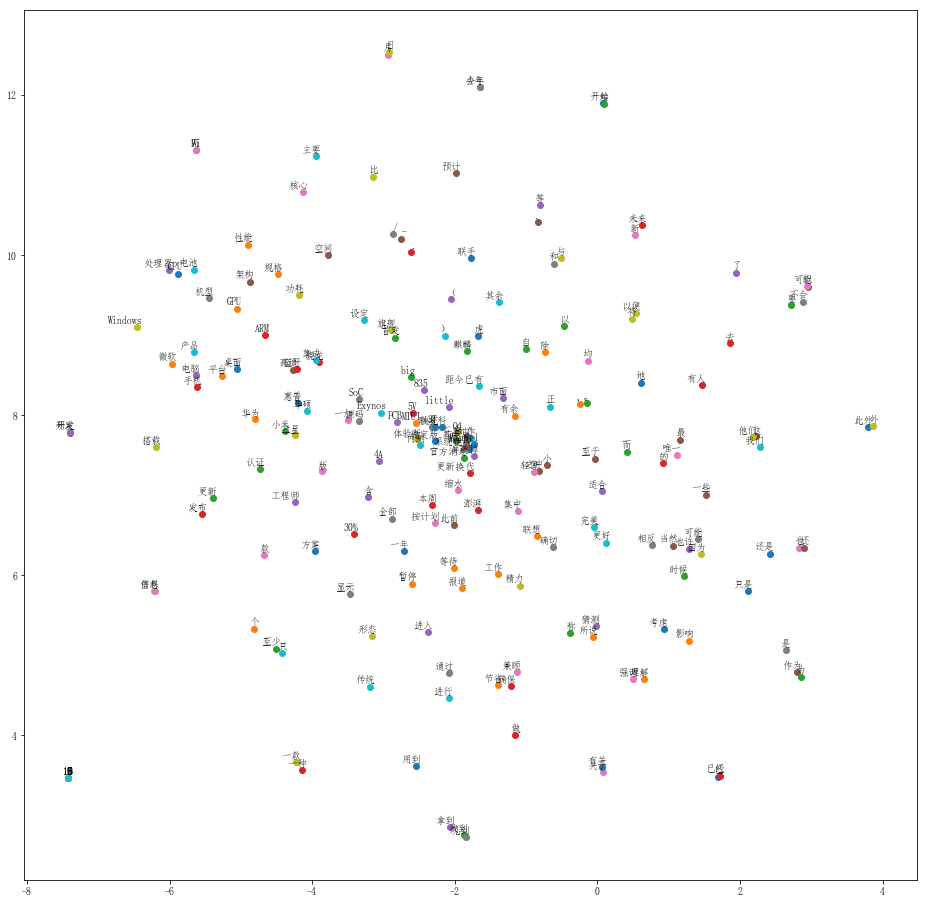

In [21]:
tsne_plot(model)